<h1>Q3<h/1>  

* #### QUELS ARRONDISSEMENTS...
* #### comportent le PLUS / le MOINS d’anomalies signalées...  
* #### PAR TYPE D'ANOMALIE

In [1]:
import pandas
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy
import csv

# df POUR DATAFRAME, JE RECUPERE TOUT ET JE VISUALISE CE DONT J'AI BESOIN
df = pandas.read_csv("dansMaRue_src.csv", sep = ';', header = 0)

#df = pandas.read_csv("dansMaRue_ECHANTILLON_2000_LIGNES.csv", sep = ';', header = 0)

# J'AFFICHE LES 5 PREMIERES LIGNES SEULEMENT
df.head()

,ID_DECLARATION,TYPE_DECLARATION,SOUS TYPE DECLARATION,ADRESSE,CODE POSTAL,VILLE,ARRONDISSEMENT,CONSEIL DE QUARTIER,DATE DECLARATION,ANNEE_DECLARATION,MOIS_DECLARATION,OUTIL SOURCE,INTERVENANT,ID_DMR,geo_shape,geo_point_2d
0,8908,"Graffitis, tags, affiches et autocollants","Graffitis sur mur, façade sur rue, pont","54 boulevard Saint-Michel, 75006 PARIS",75006,Paris 6,6,ODEON,2020-11-06,2020,11,Back Office,graffitis,B2020K008908,"{""coordinates"": [2.341156843849894, 48.8482361...","48.84823612301676,2.341156843849894"
1,9667,Propreté,Déchets et/ou salissures divers,"5 Place Charles Michels, 75015 PARIS",75015,Paris 15,15,EMERIAU - ZOLA,2020-11-06,2020,11,IOPage DMR Paris.fr application,DPE-STPP-DT,A2020K009667,"{""coordinates"": [2.285102602581971, 48.8469049...","48.84690499771227,2.285102602581971"
2,10501,Propreté,Déchets et/ou salissures divers,"224 Boulevard Saint-Germain, 75007 PARIS",75007,Paris 7,7,SAINT - THOMAS D'AQUIN,2020-11-07,2020,11,Androï,DPE-STPP-DT,G2020K010501,"{""coordinates"": [2.327545398485348, 48.8554230...","48.85542300090138,2.327545398485348"
3,10504,Objets abandonnés,Autres objets encombrants abandonnés,"17 Rue Dombasle, 75015 PARIS",75015,Paris 15,15,VAUGIRARD - PARC DES EXPOSITIONS,2020-11-07,2020,11,Androï,Ramen en tant que prestataire de DansMaRue,G2020K010504,"{""coordinates"": [2.297122497971316, 48.8362800...","48.83628000074566,2.297122497971316"
4,23631,"Graffitis, tags, affiches et autocollants","Affiches, autocollants ou graffitis sur autres...","29 Rue du Pont Neuf, 75001 PARIS",75001,Paris 1,1,LES HALLES,2020-11-14,2020,11,Androï,La Poste,G2020K023631,"{""coordinates"": [2.34483960419365, 48.86116400...","48.861164001292295,2.34483960419365"


### AFFICHE MOI LES NOMBRE DE LIGNE ET DE COLONNE ###

In [2]:
df.shape  # 

(886688, 16)

### REQUETTE QUI ME CROISE ARRONDISSEMENT PAR ANOMALIE  PAR  ANNEES ###

In [3]:
print("\n\nCROSSTAB ARRONDISSEMENTS par ANOMALIE     par ANNEES")   
q3 = pandas.crosstab( [ df['ARRONDISSEMENT'], df['TYPE_DECLARATION'] ], df['ANNEE_DECLARATION'] )
q3



CROSSTAB ARRONDISSEMENTS par ANOMALIE     par ANNEES


ANNEE_DECLARATION                                          2020   2021
ARRONDISSEMENT TYPE_DECLARATION                                       
1              Activités commerciales et professionnelles    81   1234
               Arbres, végétaux et animaux                    8    120
               Autos, motos, vélos...                       335   1955
               Eau                                            8     86
               Graffitis, tags, affiches et autocollants   1065   3217
...                                                         ...    ...
20             Mobiliers urbains                            174   1148
               Objets abandonnés                           7105  28463
               Propreté                                    1595   9233
               Voirie et espace public                      274   1364
               Éclairage / Électricité                       65    346

[200 rows x 2 columns]

### CI-DESSOUS JE TEST L'AFFICHAGE D'UNE COLONNE ET JE M'APPERCOIS QUE SEULES LES ANNEES 2020 ET 2021 SONT CONSIDERES COMME DES COLONNES ###

In [4]:
q3_elem1 = q3.iloc[:,0:1]
q3_elem1 

ANNEE_DECLARATION                                          2020
ARRONDISSEMENT TYPE_DECLARATION                                
1              Activités commerciales et professionnelles    81
               Arbres, végétaux et animaux                    8
               Autos, motos, vélos...                       335
               Eau                                            8
               Graffitis, tags, affiches et autocollants   1065
...                                                         ...
20             Mobiliers urbains                            174
               Objets abandonnés                           7105
               Propreté                                    1595
               Voirie et espace public                      274
               Éclairage / Électricité                       65

[200 rows x 1 columns]

In [5]:
q3_elem2 = q3.iloc[0:1,-1:]
q3_elem2

,ANNEE_DECLARATION,2021
ARRONDISSEMENT,TYPE_DECLARATION,
1,Activités commerciales et professionnelles,1234


### CI-DESSOUS, JE FAIS UNE SOMME SUR 2021 ET 2021 DE CHAQUE ANOMALIE. J'UTILISE LA FONCTION METHODE APPLY DE PANDAS POUR APPELER UNE FONCTION. DANS CETTE FONCTION JE FAIS UNE SOMME, UNE SOMME DE QUOI ? DE MA LIGNE CAR AXIS 1 ###

In [6]:
def Q3_somme_ligne(x):
    return(numpy.sum(x))

q3_som = q3.iloc[:,:].apply( Q3_somme_ligne, axis = 1 )
q3_som

ARRONDISSEMENT  TYPE_DECLARATION                          
1               Activités commerciales et professionnelles     1315
                Arbres, végétaux et animaux                     128
                Autos, motos, vélos...                         2290
                Eau                                              94
                Graffitis, tags, affiches et autocollants      4282
                                                              ...  
20              Mobiliers urbains                              1322
                Objets abandonnés                             35568
                Propreté                                      10828
                Voirie et espace public                        1638
                Éclairage / Électricité                         411
Length: 200, dtype: int64

### MON BUT CI-DESSOUS EST D'AFFICHER LES CLES ET LES VALEURS DU TABLEAU CI-DESSUS ###

In [7]:
key= []
val= []
for k,v in q3_som.items():
    key.append(k)
    val.append(v)
key

[(1, 'Activités commerciales et professionnelles'),
 (1, 'Arbres, végétaux et animaux'),
 (1, 'Autos, motos, vélos...'),
 (1, 'Eau'),
 (1, 'Graffitis, tags, affiches et autocollants'),
 (1, 'Mobiliers urbains'),
 (1, 'Objets abandonnés'),
 (1, 'Propreté'),
 (1, 'Voirie et espace public'),
 (1, 'Éclairage / Électricité'),
 (2, 'Activités commerciales et professionnelles'),
 (2, 'Arbres, végétaux et animaux'),
 (2, 'Autos, motos, vélos...'),
 (2, 'Eau'),
 (2, 'Graffitis, tags, affiches et autocollants'),
 (2, 'Mobiliers urbains'),
 (2, 'Objets abandonnés'),
 (2, 'Propreté'),
 (2, 'Voirie et espace public'),
 (2, 'Éclairage / Électricité'),
 (3, 'Activités commerciales et professionnelles'),
 (3, 'Arbres, végétaux et animaux'),
 (3, 'Autos, motos, vélos...'),
 (3, 'Eau'),
 (3, 'Graffitis, tags, affiches et autocollants'),
 (3, 'Mobiliers urbains'),
 (3, 'Objets abandonnés'),
 (3, 'Propreté'),
 (3, 'Voirie et espace public'),
 (3, 'Éclairage / Électricité'),
 (4, 'Activités commerciales et

In [8]:
val

[1315,
 128,
 2290,
 94,
 4282,
 498,
 2213,
 1796,
 863,
 222,
 2291,
 142,
 3046,
 60,
 5848,
 368,
 3986,
 1961,
 691,
 104,
 925,
 110,
 3508,
 108,
 9935,
 364,
 2479,
 1769,
 699,
 212,
 906,
 297,
 3069,
 82,
 7110,
 624,
 3282,
 2522,
 1043,
 293,
 975,
 188,
 5147,
 154,
 9954,
 905,
 5402,
 1888,
 1211,
 302,
 864,
 93,
 2170,
 82,
 3439,
 347,
 4540,
 1207,
 478,
 122,
 363,
 187,
 2166,
 47,
 2587,
 419,
 1866,
 4521,
 943,
 268,
 650,
 191,
 4950,
 96,
 3511,
 504,
 3810,
 6202,
 1228,
 414,
 2186,
 128,
 7050,
 117,
 10573,
 522,
 8534,
 3306,
 978,
 211,
 3634,
 332,
 10055,
 200,
 31031,
 788,
 21965,
 7117,
 1930,
 410,
 2560,
 517,
 6664,
 183,
 32321,
 1202,
 23592,
 5306,
 1659,
 567,
 1059,
 801,
 7814,
 296,
 15078,
 1688,
 21445,
 6582,
 2330,
 723,
 520,
 680,
 4793,
 219,
 11382,
 913,
 17124,
 7289,
 1622,
 554,
 642,
 442,
 6617,
 153,
 7196,
 855,
 8983,
 5885,
 1203,
 469,
 1007,
 854,
 7999,
 244,
 11274,
 1228,
 46582,
 7160,
 2960,
 863,
 699,
 692,
 840

### CEPENDANT LES REQUETTES CI-DESSUS NE ME CONVIENNENT PAS CAR JE PREFERE GARDER LA DISTINCTION ENTRE 2020 ET 2021. DONC JE VAIS REPARTIR DE MA VARIABLE Q3 TOUT EN HAUT, CONTENANT MON CROISEMENT DE TROIS COLONNES ###

### JE L'AFFICHE A NOUVEAU POUR ETRE SUR ###

In [9]:
q3

ANNEE_DECLARATION                                          2020   2021
ARRONDISSEMENT TYPE_DECLARATION                                       
1              Activités commerciales et professionnelles    81   1234
               Arbres, végétaux et animaux                    8    120
               Autos, motos, vélos...                       335   1955
               Eau                                            8     86
               Graffitis, tags, affiches et autocollants   1065   3217
...                                                         ...    ...
20             Mobiliers urbains                            174   1148
               Objets abandonnés                           7105  28463
               Propreté                                    1595   9233
               Voirie et espace public                      274   1364
               Éclairage / Électricité                       65    346

[200 rows x 2 columns]

### ET JE DECIDE FINALEMENT DE FAIRE UNE SOMME DE TOUTES ANOMALIES PAR ARRONDISSEMENT ET PAR ANNEE ###
### EN GROS J'AI 10 ANOMALIES PAR ARRONDISSEMENT ET BIEN JE SOUHAITE DORENAVENT 1 NOMBRE QUI FAIT LA SOMME DE CES 10 ANOMALIES, SOIT EN TOUT POUR L'ANNEE 2020 20 SOMMES, + 20 SOMMES POUR L'ANNEE 2021 ###

In [10]:
def Q3_somme_col(x):
    return(numpy.sum(x))

q3_som_col = q3.iloc[:,:].apply( Q3_somme_col, axis = 0 )
q3_som_col

ANNEE_DECLARATION
2020    138256
2021    748432
dtype: int64

### LE CODE CI-DESSUS NE ME CONVIENT PAS ###
### JE RETENTE ###

In [11]:
qq3 = []
for i  in q3:
    qq3.append(i)
qq3


[2020, 2021]

In [12]:
qqq3_key = []
qqq3_val = []
for k, v in q3.items():
    qqq3_key.append(k)
    qqq3_val.append(v)
qqq3_key 

[2020, 2021]

In [13]:
qqq3_val

[ARRONDISSEMENT  TYPE_DECLARATION                          
 1               Activités commerciales et professionnelles      81
                 Arbres, végétaux et animaux                      8
                 Autos, motos, vélos...                         335
                 Eau                                              8
                 Graffitis, tags, affiches et autocollants     1065
                                                               ... 
 20              Mobiliers urbains                              174
                 Objets abandonnés                             7105
                 Propreté                                      1595
                 Voirie et espace public                        274
                 Éclairage / Électricité                         65
 Name: 2020, Length: 200, dtype: int64,
 ARRONDISSEMENT  TYPE_DECLARATION                          
 1               Activités commerciales et professionnelles     1234
                 Arbres

### MOUAIS. JE SENS QUE JE VAIS GALERER AVEC CETTE REQUETTE MEME SI ELLE ME SERVIRA A FAIRE PEUT ETRE DES CAMEMBERT ET HISTOGRAMMES ###

### NOUVELLE TENTATIVE DE CROSSTAB POUR ENSUITE FAIRE UNE SOMME DES ANOMALIES PAR ARRONDISSEMENTS ###


In [14]:
q3_Ar_An_Ano = pandas.crosstab( [ df['ARRONDISSEMENT'], df['ANNEE_DECLARATION'] ], df['TYPE_DECLARATION'] )
q3_Ar_An_Ano

TYPE_DECLARATION                  Activités commerciales et professionnelles  \
ARRONDISSEMENT ANNEE_DECLARATION                                               
1              2020                                                       81   
               2021                                                     1234   
2              2020                                                       86   
               2021                                                     2205   
3              2020                                                       42   
               2021                                                      883   
4              2020                                                       44   
               2021                                                      862   
5              2020                                                       62   
               2021                                                      913   
6              2020                                                       24   
               2021                                                      840   
7              2020                                                       17   
               2021                                                      346   
8              2020                                                       35   
               2021                                                      615   
9              2020                                                      112   
               2021                                                     2074   
10             2020                                                      147   
               2021                                                     3487   
11             2020                                                      141   
               2021                                                     2419   
12             2020                                                      116   
               2021                                                      943   
13             2020                                                       51   
               2021                                                      469   
14             2020                                                       49   
               2021                                                      593   
15             2020                                                       60   
               2021                                                      947   
16             2020                                                       34   
               2021                                                      665   
17             2020                                                       67   
               2021                                                     1831   
18             2020                                                      119   
               2021                                                     3241   
19             2020                                                       27   
               2021                                                      447   
20             2020                                                       38   
               2021                                                     1085   

TYPE_DECLARATION                  Arbres, végétaux et animaux  \
ARRONDISSEMENT ANNEE_DECLARATION                                
1              2020                                         8   
               2021                                       120   
2              2020                                        12   
               2021                                       130   
3              2020                                         7   
               2021                                       103   
4              2020                                        34   
               2021                                   

### ECHANTILLON 3 LIGNES ET 1 COLONNE ###

In [15]:
q3_som_arr_an_ano = q3_Ar_An_Ano.iloc[0:3,0:1]
print(q3_som_arr_an_ano)

TYPE_DECLARATION                  Activités commerciales et professionnelles
ARRONDISSEMENT ANNEE_DECLARATION                                            
1              2020                                                       81
               2021                                                     1234
2              2020                                                       86


### SOMME DES 10 ANOMALIES PAR ARRONDISSEMENT PAR ANNEE ###

In [16]:
def Q3_som_row(x):
    return(numpy.sum(x))

In [17]:
q3_som_arr_an_ano = q3_Ar_An_Ano.iloc[:,:].apply( Q3_som_row, axis = 1 )
q3_som_arr_an_ano

ARRONDISSEMENT  ANNEE_DECLARATION
1               2020                  2187
                2021                 11514
2               2020                  2112
                2021                 16385
3               2020                  2739
                2021                 17370
4               2020                  3031
                2021                 16197
5               2020                  4181
                2021                 21945
6               2020                  2517
                2021                 10825
7               2020                  2227
                2021                 11140
8               2020                  2773
                2021                 18783
9               2020                  5017
                2021                 28588
10              2020                 12579
                2021                 64883
11              2020                 10731
                2021                 63840
12              2020

### TOP J'AI MES SOMMES PAR ARRONDISSEMENT MAIS EN QUINCONCE MAIS BON CA VA LE FAIRE ###
### SELECTION DE 2020 UNIQUEMENT via .items() ###

In [18]:
cle_arr_an_ano_2020 = []
for k, v in q3_som_arr_an_ano.items():
    if k[1] == 2020:
        cle_arr_an_ano_2020.append(v)
    
cle_arr_an_ano_2020

[2187,
 2112,
 2739,
 3031,
 4181,
 2517,
 2227,
 2773,
 5017,
 12579,
 10731,
 9050,
 6918,
 5284,
 13456,
 6222,
 9669,
 14240,
 11082,
 12241]

In [19]:
len(cle_arr_an_ano_2020)

20

### SELECTION DE 2021 UNIQUEMENT via .items() ###

In [20]:
cle_arr_an_ano_2021 = []
for k, v in q3_som_arr_an_ano.items():
    if k[1] == 2021:
        cle_arr_an_ano_2021.append(v)
    
cle_arr_an_ano_2021

[11514,
 16385,
 17370,
 16197,
 21945,
 10825,
 11140,
 18783,
 28588,
 64883,
 63840,
 48766,
 38178,
 27161,
 66715,
 34656,
 48237,
 82911,
 56142,
 64196]

In [21]:
len(cle_arr_an_ano_2021)

20

### FINALEMENT JE NE SUIS PAS CONVAINCU PAR LES REQUETTES CI-DESSUS ###
### POUR REPONDRE A LA QUESTION DE FACON BEAUCOUP PLUS SIMPLE ET PRECISE JE CHOISI UNE AUTRE REQUETTES ####
### CAR ETANT DONNE QUE L'ON NE PARLE PAS DES ANNEES DANS LA QUESTION 3, JE DECIDE DE CROISER SEULEMENT LES COLONNES ARRONDISSEMENT / ANOMALIES ###
### ESSAI CROSSTAB ARRONDISSEMENT / ANOMALIES ###

In [22]:
q3_CROSS_arr_ano = pandas.crosstab( df['ARRONDISSEMENT'], df['TYPE_DECLARATION'] )
q3_CROSS_arr_ano

TYPE_DECLARATION,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité
ARRONDISSEMENT,,,,,,,,,,
1,1315,128,2290,94,4282,498,2213,1796,863,222
2,2291,142,3046,60,5848,368,3986,1961,691,104
3,925,110,3508,108,9935,364,2479,1769,699,212
4,906,297,3069,82,7110,624,3282,2522,1043,293
5,975,188,5147,154,9954,905,5402,1888,1211,302
6,864,93,2170,82,3439,347,4540,1207,478,122
7,363,187,2166,47,2587,419,1866,4521,943,268
8,650,191,4950,96,3511,504,3810,6202,1228,414
9,2186,128,7050,117,10573,522,8534,3306,978,211


### RECHERCHE DU MIN PUIS CONCATENATION DU MIN AU DATAFRAME ###

In [23]:
def Q3_min(x):
    return(numpy.min(x))
anomalie_MIN = q3_CROSS_arr_ano.iloc[:,:].apply( Q3_min, axis = 1 )
anomalie_MIN

ARRONDISSEMENT
1      94
2      60
3     108
4      82
5     154
6      82
7      47
8      96
9     117
10    200
11    183
12    296
13    219
14    153
15    244
16    229
17    458
18    331
19    196
20    279
dtype: int64

In [24]:
q3_CROSS_arr_ano = pandas.concat([q3_CROSS_arr_ano,anomalie_MIN],axis=1)
q3_CROSS_arr_ano

,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité,0
ARRONDISSEMENT,,,,,,,,,,,
1,1315,128,2290,94,4282,498,2213,1796,863,222,94
2,2291,142,3046,60,5848,368,3986,1961,691,104,60
3,925,110,3508,108,9935,364,2479,1769,699,212,108
4,906,297,3069,82,7110,624,3282,2522,1043,293,82
5,975,188,5147,154,9954,905,5402,1888,1211,302,154
6,864,93,2170,82,3439,347,4540,1207,478,122,82
7,363,187,2166,47,2587,419,1866,4521,943,268,47
8,650,191,4950,96,3511,504,3810,6202,1228,414,96
9,2186,128,7050,117,10573,522,8534,3306,978,211,117


### RECHERCHE DU MAX PUIS CONCATENATION MAX AU DATAFRAME ###

In [25]:
def Q3_max(x):
    return(numpy.max(x))
anomalie_MAX = q3_CROSS_arr_ano.iloc[:,:].apply( Q3_max, axis = 1 )
anomalie_MAX

ARRONDISSEMENT
1      4282
2      5848
3      9935
4      7110
5      9954
6      4540
7      4521
8      6202
9     10573
10    31031
11    32321
12    21445
13    17124
14     8983
15    46582
16    14695
17    21964
18    38799
19    30628
20    35568
dtype: int64

### JE N'AI PAS REUSSI A RENOMMER LES DEUX DERNIERES COLONNES QUE JE VIENS DE CONCATENER, LE PREMIER 0 CORRESPOND AU MIN ET LE 2E 0 CORRESPOND AU MAX ###

In [26]:
q3_CROSS_arr_ano = pandas.concat([q3_CROSS_arr_ano,anomalie_MAX], axis=1)
q3_CROSS_arr_ano

,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité,0,0
ARRONDISSEMENT,,,,,,,,,,,,
1,1315,128,2290,94,4282,498,2213,1796,863,222,94,4282
2,2291,142,3046,60,5848,368,3986,1961,691,104,60,5848
3,925,110,3508,108,9935,364,2479,1769,699,212,108,9935
4,906,297,3069,82,7110,624,3282,2522,1043,293,82,7110
5,975,188,5147,154,9954,905,5402,1888,1211,302,154,9954
6,864,93,2170,82,3439,347,4540,1207,478,122,82,4540
7,363,187,2166,47,2587,419,1866,4521,943,268,47,4521
8,650,191,4950,96,3511,504,3810,6202,1228,414,96,6202
9,2186,128,7050,117,10573,522,8534,3306,978,211,117,10573


### JE RENOME LE TITRE DE MA COLONNE MAX ###

### JE RENOME LE TITRE DE MA COLONNE MIN ###

### EXTRAIRE LES CLES ET VALEURS DANS DES LISTES POUR MON CAMEMBERT ###

In [27]:
cle_q3_ano = []
val_q3_nb = []
for k, v in q3_CROSS_arr_ano.items():
    cle_q3_ano.append(k)
    val_q3_nb.append(v)
cle_q3_ano

['Activités commerciales et professionnelles',
 'Arbres, végétaux et animaux',
 'Autos, motos, vélos...',
 'Eau',
 'Graffitis, tags, affiches et autocollants',
 'Mobiliers urbains',
 'Objets abandonnés',
 'Propreté',
 'Voirie et espace public',
 'Éclairage / Électricité',
 0,
 0]

In [28]:
val_q3_nb

[ARRONDISSEMENT
 1     1315
 2     2291
 3      925
 4      906
 5      975
 6      864
 7      363
 8      650
 9     2186
 10    3634
 11    2560
 12    1059
 13     520
 14     642
 15    1007
 16     699
 17    1898
 18    3360
 19     474
 20    1123
 Name: Activités commerciales et professionnelles, dtype: int64,
 ARRONDISSEMENT
 1     128
 2     142
 3     110
 4     297
 5     188
 6      93
 7     187
 8     191
 9     128
 10    332
 11    517
 12    801
 13    680
 14    442
 15    854
 16    692
 17    762
 18    665
 19    633
 20    808
 Name: Arbres, végétaux et animaux, dtype: int64,
 ARRONDISSEMENT
 1      2290
 2      3046
 3      3508
 4      3069
 5      5147
 6      2170
 7      2166
 8      4950
 9      7050
 10    10055
 11     6664
 12     7814
 13     4793
 14     6617
 15     7999
 16     8401
 17     9872
 18     9178
 19     7671
 20     9274
 Name: Autos, motos, vélos..., dtype: int64,
 ARRONDISSEMENT
 1      94
 2      60
 3     108
 4      82
 5     154
 

### Finalement le code ci-dessus me pose probleme car je veux recuprer les valeur des anomalies et non les valeurs des arrondissements pour mes camemberts ###
### ALORS JE TENTE UN ILOC CAR MON BUT ICI EN OBSERVANT ATENTIVEMENT LE TABLEAU GENERALE CONTENANT LES NOUVELLLES COLONNE MIN ET MAX, C'EST D'EXTRAIRE DANS UN GRAPHIQUE LE 7 E ET LE 15 ARRONDISSEMENT ###
### CAR LE 7E CONTIENT L'ANOMALIE LA MOINS SIGNALEE PAR ANOMALIE ET PAR ARRONDISSEMEN ET LE 15E POSSEDE L'ANOMALIE LA PLUS SIGNALEE PAR ANOMALIE PAR ANOMALIE ET PAR ARRONDISSEMENT ###

### CI-DESSOUS ILOC POUR CAPTER LE 7E ARRONDISSEMENT MAIS [6:7 BLABLA] ME RENVOIE UN DATAFRAM ALORS QUE MOI JE VEUX UNE LISTE POUR MON CAMEMBERT]###

In [29]:
q3_CROSS_arr_ano.iloc[6:7,:]

,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité,0,0
ARRONDISSEMENT,,,,,,,,,,,,
7,363,187,2166,47,2587,419,1866,4521,943,268,47,4521


### MEME PROBLEME ###

In [30]:
q3_CROSS_arr_ano.iloc[14:15,:]


,Activités commerciales et professionnelles,"Arbres, végétaux et animaux","Autos, motos, vélos...",Eau,"Graffitis, tags, affiches et autocollants",Mobiliers urbains,Objets abandonnés,Propreté,Voirie et espace public,Éclairage / Électricité,0,0
ARRONDISSEMENT,,,,,,,,,,,,
15,1007,854,7999,244,11274,1228,46582,7160,2960,863,244,46582


### IMPECABLE J'ARRIVE A EXTRAIRE UNE LISTE CLE VALEUR ###

In [31]:
q3_CROSS_arr_ano.iloc[6,:]

Activités commerciales et professionnelles     363
Arbres, végétaux et animaux                    187
Autos, motos, vélos...                        2166
Eau                                             47
Graffitis, tags, affiches et autocollants     2587
Mobiliers urbains                              419
Objets abandonnés                             1866
Propreté                                      4521
Voirie et espace public                        943
Éclairage / Électricité                        268
0                                               47
0                                             4521
Name: 7, dtype: int64

In [32]:
type(q3_CROSS_arr_ano.iloc[6,:])

pandas.core.series.Series

### JE DECIDE DE SELECTIONNER LE 7E ARRONDISSEMENT MOINS LES MIN ET MAX CAR JE N4EN AI PLUS BESOIN POUR MES GRAPHE. JE FAIT JUSTE UN TRIE VIA SORT_VALUES() ###

In [33]:
arr_min_par_ano = q3_CROSS_arr_ano.iloc[6,:-2].sort_values()
arr_min_par_ano

Eau                                             47
Arbres, végétaux et animaux                    187
Éclairage / Électricité                        268
Activités commerciales et professionnelles     363
Mobiliers urbains                              419
Voirie et espace public                        943
Objets abandonnés                             1866
Autos, motos, vélos...                        2166
Graffitis, tags, affiches et autocollants     2587
Propreté                                      4521
Name: 7, dtype: int64

In [34]:
arr_min_par_ano[0]

47

In [35]:
arr_min_par_ano[1]

187

### AFFICHAGE CLE VALEUR DU PIE 7E ARR VIA LA METHODE ITEMS() DE PYTHON ###

In [36]:
varKey = []
varVal = []
for k, v in arr_min_par_ano.items():
    varKey.append(k)
    varVal.append(v)

varKey

['Eau',
 'Arbres, végétaux et animaux',
 'Éclairage / Électricité',
 'Activités commerciales et professionnelles',
 'Mobiliers urbains',
 'Voirie et espace public',
 'Objets abandonnés',
 'Autos, motos, vélos...',
 'Graffitis, tags, affiches et autocollants',
 'Propreté']

In [37]:
varVal

[47, 187, 268, 363, 419, 943, 1866, 2166, 2587, 4521]

### TOP, LES CLE VONT REPRESENTER MES LABEL TOUT AUTOUR DU CAMEMBERT OU DANS LA LEGENDE ET LES VALEUR CORRESPONDRONT AU PART DE CAMEMBERT ###

### DEBUT CAMEMBERT 7E ARRONDISSEMENT , car je m'interesse au min du min ###

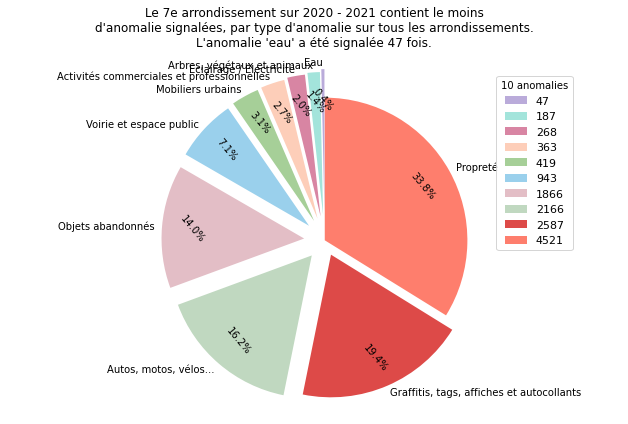

In [38]:
# eclate2() va séparer les parts pour qu'il ai du vide autour
eclate7 = (0.20, 0.18, 0.17, 0.16, 0.155, 0.15, 0.145, 0.14, 0.11, 0)

# je recupere sur le web les couleurs de mon choix pour embelir mon graphique et ne pas laisser les couleurs par defaut
colors = ['#BAABDA','#A3E4DB','#D885A3','#FDCEB9','#A6CF98',
          '#9AD0EC','#E3BEC6','#C0D8C0','#DD4A48','#FE7E6D',
          '#FFA1C9','#9145B6','#00B4D8','#BF8B67','#C7B198',
          '#FFAD60','#ACB992','#8B9A46','#6998AB','#398AB9',]

fig2, ax2 = plt.subplots(figsize=(11, 6.7)) # figsize() est la largeur hauteur de mon graphe

camemb7 = ax2.pie( varVal,       labels = varKey,
         explode = eclate7,
         colors=colors,
         autopct='%1.1f%%',      # UN ZERO APRES LA VIRGULE
         startangle=90,          # ROTATION DU CAMEMBERT
         pctdistance = 0.79,     # les pourcentages
         labeldistance = 1.05,   # les arrondissements
         )

# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb7[2]
for text in x:
    text.set_rotation(-50)
    
ax2.axis('equal')

ax2.set_title(f"Le 7e arrondissement sur 2020 - 2021 contient le moins\n\
d'anomalie signalées, par type d'anomalie sur tous les arrondissements.\n\
L'anomalie 'eau' a été signalée {varVal[0]} fois.").set_fontsize(12)

plt.legend(     varVal,                      # numpy.sort(val2021),
           title="10 anomalies",             # title=f"Anomalies\nmax {val2021_max}\nmin {val2021_min}"
           prop={'size': 11},                 # TAILLE DE MA LEGENDE
           loc=0, bbox_to_anchor=(0.93,0.95) # CES ELEMENTS ME POSTIONNENT EN BAS MA LEGENDE
           )

#plt.savefig('img/Q3_pie_MIN.png')                # ENREGISTREMENT DE L'IMAGE AU MEME EMPLACEMENT QUE CE FICHIER

plt.show()                                   # AFFICHAGE (stdout)

### JE DECIDE DE METTRE LES LABEL DANS MA LEGENDE CAR LA ILS SE CHAVAUCHENT, CE N'EST PAS LISIBLE ###

### MAIS POUR CELA JE DOIS DONNER UNE LISTE DE COUPLE A LA LEGEND() DE MON GRAPHE ###
### COMPREHENSSION POUR MA LEGENDE GRAPHIQUE ###

In [39]:
K_V  = { k:v for k,v in arr_min_par_ano.items() }
print("-->",K_V)

--> {'Eau': 47, 'Arbres, végétaux et animaux': 187, 'Éclairage / Électricité': 268, 'Activités commerciales et professionnelles': 363, 'Mobiliers urbains': 419, 'Voirie et espace public': 943, 'Objets abandonnés': 1866, 'Autos, motos, vélos...': 2166, 'Graffitis, tags, affiches et autocollants': 2587, 'Propreté': 4521}


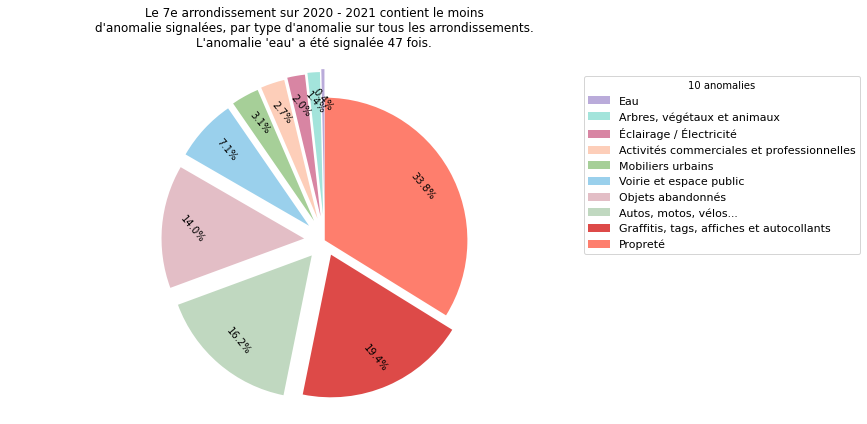

In [40]:
# eclate2() va séparer les parts pour qu'il ai du vide autour
eclate7 = (0.20, 0.18, 0.17, 0.16, 0.155, 0.15, 0.145, 0.14, 0.11, 0)

# je recupere sur le web les couleurs de mon choix pour embelir mon graphique et ne pas laisser les couleurs par defaut
colors = ['#BAABDA','#A3E4DB','#D885A3','#FDCEB9','#A6CF98',
          '#9AD0EC','#E3BEC6','#C0D8C0','#DD4A48','#FE7E6D',
          '#FFA1C9','#9145B6','#00B4D8','#BF8B67','#C7B198',
          '#FFAD60','#ACB992','#8B9A46','#6998AB','#398AB9',]

fig2, ax2 = plt.subplots(figsize=(11, 6.7)) # figsize() est la largeur hauteur de mon graphe

camemb7 = ax2.pie( varVal,       # labels = varKey, # JE MASQUE MES LABELS KEYS
         explode = eclate7,
         colors=colors,
         autopct='%1.1f%%',      # UN ZERO APRES LA VIRGULE
         startangle=90,          # ROTATION DU CAMEMBERT
         pctdistance = 0.79,     # les pourcentages
         labeldistance = 1.05,   # les arrondissements
         )

# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb7[2]
for text in x:
    text.set_rotation(-50)
    
ax2.axis('equal')

ax2.set_title(f"Le 7e arrondissement sur 2020 - 2021 contient le moins\n\
d'anomalie signalées, par type d'anomalie sur tous les arrondissements.\n\
L'anomalie 'eau' a été signalée {varVal[0]} fois.").set_fontsize(12)

plt.legend(K_V,     # varVal,                 # 
           title="10 anomalies",             # 
           prop={'size': 11},                 # TAILLE DE MA LEGENDE
           loc=0, bbox_to_anchor=(0.93,0.95) # CES ELEMENTS ME POSTIONNENT EN BAS MA LEGENDE
           )

plt.savefig('img/Q3_pie_MIN.png')                # ENREGISTREMENT DE L'IMAGE AU MEME EMPLACEMENT QUE CE FICHIER

plt.show()                                   # AFFICHAGE (stdout)

### HUM J'AI UN PROBLEME, IL NE PREND PAS MES VALEURS DANS LA LEGENDE !! ESSAYONS AUTREMENT AVEC LA FONCTION ZIP DE PYTHON ###

In [41]:
K_V = [    i + ' : ' + str(j)   for i, j in zip( varKey, varVal )   ]
K_V

['Eau : 47',
 'Arbres, végétaux et animaux : 187',
 'Éclairage / Électricité : 268',
 'Activités commerciales et professionnelles : 363',
 'Mobiliers urbains : 419',
 'Voirie et espace public : 943',
 'Objets abandonnés : 1866',
 'Autos, motos, vélos... : 2166',
 'Graffitis, tags, affiches et autocollants : 2587',
 'Propreté : 4521']

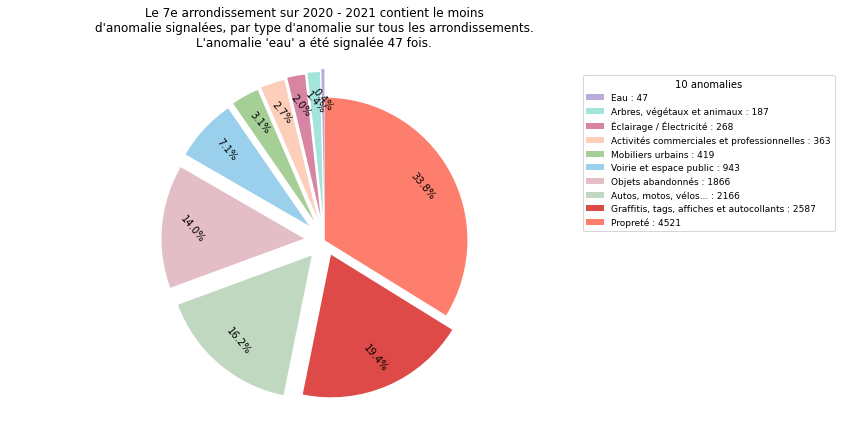

In [42]:
# eclate2() va séparer les parts pour qu'il ai du vide autour
eclate7 = (0.20, 0.18, 0.17, 0.16, 0.155, 0.15, 0.145, 0.14, 0.11, 0)

# je recupere sur le web les couleurs de mon choix pour embelir mon graphique et ne pas laisser les couleurs par defaut
colors = ['#BAABDA','#A3E4DB','#D885A3','#FDCEB9','#A6CF98',
          '#9AD0EC','#E3BEC6','#C0D8C0','#DD4A48','#FE7E6D',
          '#FFA1C9','#9145B6','#00B4D8','#BF8B67','#C7B198',
          '#FFAD60','#ACB992','#8B9A46','#6998AB','#398AB9',]

fig2, ax2 = plt.subplots(figsize=(11, 6.7)) # figsize() est la largeur hauteur de mon graphe

camemb7 = ax2.pie( varVal,       # labels = varKey, # JE MASQUE MES LABELS KEYS
         explode = eclate7,
         colors=colors,
         autopct='%1.1f%%',      # UN ZERO APRES LA VIRGULE
         startangle=90,          # ROTATION DU CAMEMBERT
         pctdistance = 0.79,     # les pourcentages
         labeldistance = 1.05,   # les arrondissements
         )

# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb7[2]
for text in x:
    text.set_rotation(-50)
    
ax2.axis('equal')

ax2.set_title(f"Le 7e arrondissement sur 2020 - 2021 contient le moins\n\
d'anomalie signalées, par type d'anomalie sur tous les arrondissements.\n\
L'anomalie 'eau' a été signalée {varVal[0]} fois.").set_fontsize(12)

plt.legend(K_V,     # varVal,                 # 
           title="10 anomalies",             # 
           prop={'size': 9},                 # TAILLE DE MA LEGENDE
           loc=0, bbox_to_anchor=(0.93,0.95) # CES ELEMENTS ME POSTIONNENT EN BAS MA LEGENDE
           )

plt.savefig('img/Q3_pie_MIN.png')                # ENREGISTREMENT DE L'IMAGE AU MEME EMPLACEMENT QUE CE FICHIER

plt.show()                                   # AFFICHAGE (stdout)

### TOP, J'AI UN GRAPH LISIBLE ET UNE LEGENDE AVEC EN CLE LES ANOMALIES ET EN VALEUR LA SOMME ###

### FIN CAMEMBERT 7E ARRONDISSEMENT ###

## ------------------------------------------ ##

### DEBUT CAMEMBERT 15E ARRONDISSEMENT, car je m'interesse au min du min ###

### JE SELECTIONNE LE 15E ARRONDISSEMENT MOINS LE MIN ET LE MAX de la colonne CAR J'EN AI PAS BESOIN POUR LE CAMEMBERT ET JE FAIS UN TRIE DU PETIT AU PLUS GRAND ###

In [43]:
arr_min_par_ano_15E = q3_CROSS_arr_ano.iloc[14,:-2].sort_values()
arr_min_par_ano_15E

Eau                                             244
Arbres, végétaux et animaux                     854
Éclairage / Électricité                         863
Activités commerciales et professionnelles     1007
Mobiliers urbains                              1228
Voirie et espace public                        2960
Propreté                                       7160
Autos, motos, vélos...                         7999
Graffitis, tags, affiches et autocollants     11274
Objets abandonnés                             46582
Name: 15, dtype: int64

### AFFICHAGE CLE VALEUR DU PIE 15E ARR ###

In [44]:
varKey15 = []
varVal15 = []
for k, v in arr_min_par_ano_15E.items():
    varKey15.append(k)
    varVal15.append(v)

varKey15

['Eau',
 'Arbres, végétaux et animaux',
 'Éclairage / Électricité',
 'Activités commerciales et professionnelles',
 'Mobiliers urbains',
 'Voirie et espace public',
 'Propreté',
 'Autos, motos, vélos...',
 'Graffitis, tags, affiches et autocollants',
 'Objets abandonnés']

In [45]:
varVal15

[244, 854, 863, 1007, 1228, 2960, 7160, 7999, 11274, 46582]

In [46]:
### ZIP POUR MA LEGENDE GRAPHIQUE ###

In [47]:
K_V_15 = [    i + ' : ' + str(j)   for i, j in zip( varKey15, varVal15 )   ]
print("-->",K_V_15)

--> ['Eau : 244', 'Arbres, végétaux et animaux : 854', 'Éclairage / Électricité : 863', 'Activités commerciales et professionnelles : 1007', 'Mobiliers urbains : 1228', 'Voirie et espace public : 2960', 'Propreté : 7160', 'Autos, motos, vélos... : 7999', 'Graffitis, tags, affiches et autocollants : 11274', 'Objets abandonnés : 46582']


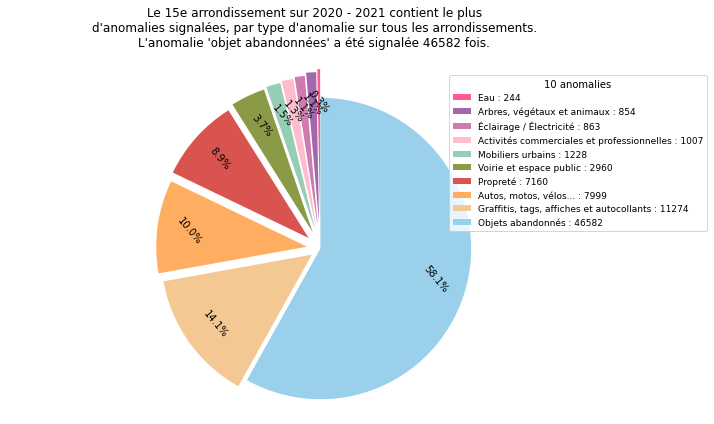

In [48]:
eclate3 = (0.19, 0.17, 0.15, 0.14, 0.13, 0.12, 0.105, 0.09, 0.07, 0)

colors2 = ['#FF5C8D','#A267AC','#CE7BB0','#FFBCD1','#96CEB4',
          '#8B9A46','#D9534F','#FFAD60','#F3C892','#9AD0EC',
          '#EA99D5','#35858B','#AEFEFF','#D9D7F1','#D3DEDC',
          '#92A9BD','#FF8E00','#CA965C','#548CFF','#B1D0E0',]

fig2, ax2 = plt.subplots(figsize=(11, 6.7))

camemb15 = ax2.pie( varVal15, 
         explode = eclate3,
         colors=colors2,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance = 0.79,   
         labeldistance = 1.05,   
         )

x = camemb15[2]
for text in x:
    text.set_rotation(-50)

ax2.axis('equal')

ax2.set_title(f"Le 15e arrondissement sur 2020 - 2021 contient le plus\n\
d'anomalies signalées, par type d'anomalie sur tous les arrondissements.\n\
L'anomalie 'objet abandonnées' a été signalée {varVal15[-1]} fois.").set_fontsize(12)

plt.legend(K_V_15,            
           loc=9, bbox_to_anchor=(0.93,0.95),
           title="10 anomalies",           
           prop={'size': 9},           
           )

plt.savefig('img/Q3_pie_MAX.png')

plt.show()

### FIN CAMEMBERT 15E ARRONDISSEMENT ###

### ----- THE END ----- ###

## ------------------------------------------ ##

### ICI J'AFFICHE MES DEUX CAMEMBERT SUR UNE LIGNE ###

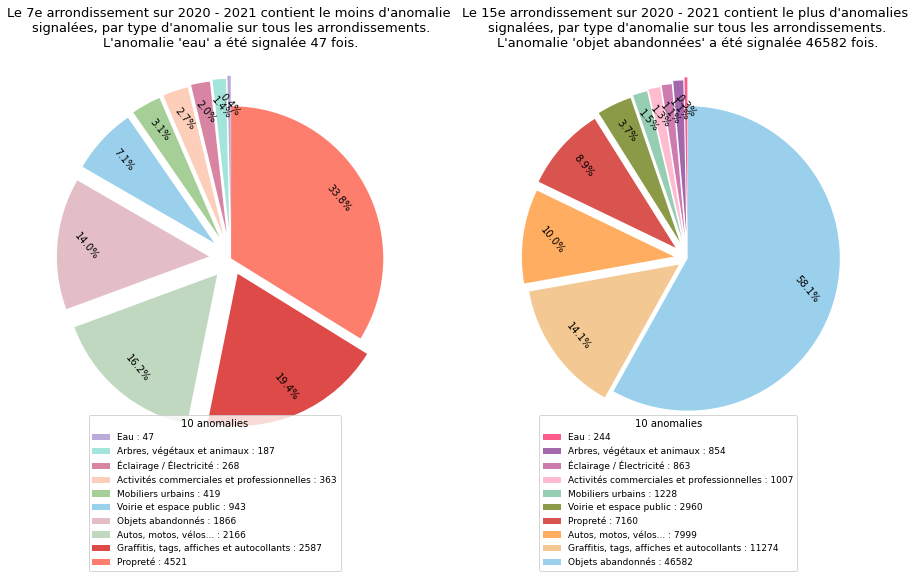

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))



# --------- CAMEMBERT 1 ---------

eclate7 = (0.20, 0.18, 0.17, 0.16, 0.155, 0.15, 0.145, 0.14, 0.11, 0)

colors = ['#BAABDA','#A3E4DB','#D885A3','#FDCEB9','#A6CF98',
          '#9AD0EC','#E3BEC6','#C0D8C0','#DD4A48','#FE7E6D',
          '#FFA1C9','#9145B6','#00B4D8','#BF8B67','#C7B198',
          '#FFAD60','#ACB992','#8B9A46','#6998AB','#398AB9',]

plt.subplot(121) 

camemb7 = axes[0].pie( varVal,       
         explode = eclate7,
         colors=colors,
         autopct='%1.1f%%',      
         startangle=90,          
         pctdistance = 0.81,     
         labeldistance = 1.05,   
         )


# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb7[2]
for text in x:
    text.set_rotation(-50)
    

axes[0].set_title(f"Le 7e arrondissement sur 2020 - 2021 contient le moins \
d'anomalie \nsignalées, par type d'anomalie sur tous les arrondissements.\n\
L'anomalie 'eau' a été signalée {varVal[0]} fois.\n").set_fontsize(13)


axes[0].legend(K_V,                
           title="10 anomalies",             
           prop={'size': 9},                 
           loc=1, bbox_to_anchor=(0.8,0.1), # 1er param ligne, 2e param colonne
           )






# --------- CAMEMBERT 2 ---------

eclate15 = (0.19, 0.17, 0.15, 0.14, 0.13, 0.12, 0.105, 0.09, 0.07, 0)

colors2 = ['#FF5C8D','#A267AC','#CE7BB0','#FFBCD1','#96CEB4',
          '#8B9A46','#D9534F','#FFAD60','#F3C892','#9AD0EC',
          '#EA99D5','#35858B','#AEFEFF','#D9D7F1','#D3DEDC',
          '#92A9BD','#FF8E00','#CA965C','#548CFF','#B1D0E0',]

plt.subplot(122)

camemb15 = axes[1].pie( varVal15, 
         explode = eclate15,
         colors=colors2,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance = 0.81,   
         labeldistance = 1.05
         )


# CE CODE RECUPERÉ SUR STACKOVERFLOW APPLIQUE UNE ROTATION A MES VALEURS POURCENT
x = camemb15[2]
for text in x:
    text.set_rotation(-50)


axes[1].set_title(f"Le 15e arrondissement sur 2020 - 2021 contient le plus \
d'anomalies \nsignalées, par type d'anomalie sur tous les arrondissements.\n\
L'anomalie 'objet abandonnées' a été signalée {varVal15[-1]} fois.\n").set_fontsize(13)

axes[1].legend(K_V_15,            
           title="10 anomalies",           
           prop={'size': 9},     
           loc=1, bbox_to_anchor=(0.8,0.1),
           )




plt.savefig('img/Q3_2camembert.png')

plt.show()

### FIN CAMEMBERT DOUBLE ###